<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="90%"> </td>
     
  </tr>
</table> 
</div>

<center><h1>Parisian associations grants prediction challenge</h1></center>
<br/>
<center><b>Angelo CANESSO, Enrique GOMEZ, Saif Eddine GHRIBI,<br /> 
Ramzi HAMDI, Ahlem JOUIDI, Leandro NASCIMIENTO</b></center>

## Table of Contents

1. [Introduction](#Introduction)
2. [Goal](#Goal)
3. [Elements](#Elements)
  1. [Predictor](#Predictor)
  2. [Score Metric](#Score-Metric)
    1. [Classification Metric](#Classification-Metric)
    2. [Regression Metric](#Regression-Metric)
  3. [Data](#Data)
4. [Data Analysis](#Data-Analysis)
  1. [Load Libraries](#Load-Libraries)
  2. [Load Data](#Load-Data)
  3. [Data Exploration](#Data-Exploration)
  4. [Data Visualization](#Data-Visualization)
5. [Pipeline](#Pipeline)
  1. [Feature Extractor](#Feature-Extractor)
  2. [Regressor](#Regressor)
  3. [Training](#Training)
  4. [Score Comparison](#Score-Comparison)
6. [Using RAMP](#Using-RAMP)
  1. [Submission Structure](#Submission-Structure)
  2. [Local Testing](#Local-Testing)
  3. [Submitting to RAMP studio](#Submitting-to-[ramp.studio](http://ramp.studio))
7. [More information](#More-information)

# Introduction


Associations are an important part of life in France. Nearly a half of the total population participates in at least one of these entities. Their attractivity is linked to their versatility and the ease of forming one. In fact, there are associations of all kinds. From culture to sports or education, we can find associations in almost every aspect of life. There is no excuse not to be part of one. Moreover, the steps to form one are straight forward. Although it is necessary to fill up some forms, it usually does not take much time to complete all the procedures.

Appart from having the pleasure to work alongside people with common interests, being able to manage money without being taxed (in most cases) is arguably the best advantage of associations. In fact, they can generate wealth by doing profitable activities or receive funds from public or private sources. This money has to benefit exclusively the association as a whole and not some particular members. In that fashion, a sports club can buy the equipment for its members or a humanitarian association can offer free food for homeless people.

Nevertheless, most associations cannot make enough money on their own and have to rely on public institutions for funding in the form of grants, equipment, accomodations, etc. Unfortunately, the associative jungle is large (cumulative budget of associations goes up to 70 billion of euros) and grants cannot be given to all. So, each public entity makes a selection of applications in order to give grants in a fair manner. For example, Paris city calls for projects and gives grants according to the budget specified in the application form. This comes to determine whether the association's project is worth the money it is asking.
<img border="0" src="https://www.saintjeannet.com/wp-content/uploads/2017/10/PictoSubventions.jpg" width="30%">


Therefore, we found interesting to design a model to estimate how worth a project is based on a given application form and give the subvention if the amount of asked money is reasonable. The model could be useful for public institutions to ease the decision-making process. This problem could be extrapolated to add constraints such as the maximum budget approved by the intitutions for grants. Additionally, it could help associations to know beforehand if they will probably receive the grant in order to calibrate their expectations.

# Goal

The aim of this challenge is to use the dataset `subventions-accordees-et-refusees.csv` to predict if each project  deserves a grant and, if so, how much money it should receive. This will be done in two separate tasks.  
The first thing to determine is if a grant will  be given to an association based on the information filled up on the application form. This information could be useful for either the association and the public institution. The former would know in advance its chances to get the grant. The latter will have a decision making tool available.

Then, we want to predict how much money the association should receive. The public entities could use this information for planification and, eventually, for fraud detection if the model is very accurate.

# Elements

## Predictor

Two predictors will be used to accomplish those tasks: a **classifier** and a **regressor**. The former will determine if a grant is given or not. So, this task is a binary classification. Then, if the granted was given by the first predictor, the second objective is determine how much the project is worth. This second task will be accomplished by a regressor.

## Data


The data used in this challenge was extracted from the website [opendata.paris.fr](https://opendata.paris.fr/explore/dataset/subventions-accordees-et-refusees/information/?disjunctive.collectivite&disjunctive.nom_beneficiaire&disjunctive.direction&disjunctive.secteurs_d_activites_definies_par_l_association). This site contains all the datasets published by the City of Paris and its associates following the initiative **Open Data**, which promotes the democratization of information and transparency of institutions.
<img border="0" src="https://opendata.paris.fr/assets/theme_image/header.png" width="30%">

Our dataset contains the list of grants given (or not) to associations by the City of Paris from 2013 to 2019 (and given by the Île-de-France Department from 2013 to 2018, when it merged with City of Paris). It contains only grants given to associations (registered under the *"loi 1901"*) and not those given to non associative organisms (like SCOP, SCIC, public entities, etc.). The no financial contributions (infrastructure, equipment, materials, staff) are not included either 

Every grant request (so every entry in the dataset) contains this information:

- `Financial Year` (Année budgétaire)
- `Collectivity` (Collectivité) : City or department (from 2013 to 2018).
- `Association's Name` (Nom Bénéficiaire)
- `Siret number` (Numéro Siret)
- `Object` (Objet du dossier) : Title of the project(s) which were presented to apply for a grant
- `Voted amount` (Montant voté) : Amount of money given by the Paris City Council after the evaluation of the application. If the value is missing, the application was rejected and the grant not given
- `Direction` (Direction) : Direction of the city treating the grant application (many direction could co-finance a project)
- `Grant Type` (Nature de la subvention) :
  - `Investment` (Investissement) : finance the goods which represent the patrimony of the association
  - `Exploitation` (Fonctionnement) : 
      - For the  association's annual expenses.
      - For the  association's projects.
- `Association's Fields` (Secteur d’activités)

# Data Analysis

## Load Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split

## Load data 

    
* Let's load our training set:

* The target data is the output we wish to predict (a grant is given or not and how much it worth),and the input dataframe consists of the the different features we discribed above.

In [50]:
df = pd.read_csv("subventions-accordees-et-refusees.csv", delimiter=';')
df.head()

,Numéro de dossier,Année budgétaire,Collectivité,Nom Bénéficiaire,Numéro Siret,Objet du dossier,Montant voté,Direction,Nature de la subvention,Secteurs d'activités définies par l'association
0,2017_07217,2017,Ville de Paris,MU,44849529100057,Embrasser,0,DAC,Non précisée,Communication & média;Culture & Arts;Technique...
1,2017_03526,2017,Ville de Paris,MU,44849529100057,fonctionnement,25000,DAC,Fonctionnement,Communication & média;Culture & Arts;Technique...
2,2017_01057,2017,Ville de Paris,MULTIKULTIMEDIA,79118462500014,D'ailleurs et d'ici 2017,5000,DDCT,Projet,Communication & média;Mémoire;Social
3,2017_01513,2017,Ville de Paris,NEZDAMES ET NEZSIEURS,49137876600027,festival Et 20 l'été,0,DAC,Non précisée,Culture & Arts
4,2017_02858,2017,Ville de Paris,NO MAN'S LAND,53268273900026,Duo pour une amoureuse et son ordinateur,2500,DAC,Projet,Culture & Arts


In [51]:
df.isna().sum()/df.shape[0]

Numéro de dossier                                  0.000000
Année budgétaire                                   0.000000
Collectivité                                       0.000000
Nom Bénéficiaire                                   0.000355
Numéro Siret                                       0.002706
Objet du dossier                                   0.000000
Montant voté                                       0.000000
Direction                                          0.000000
Nature de la subvention                            0.000000
Secteurs d'activités définies par l'association    0.000507
dtype: float64


    
* Approximately the most of the entries in the dataset are completely filled, only three columns have few None values.

## Exploratory data analysis

In [52]:
#get y column 
y = df["Montant voté"]
# Lets redefine column names
df = df.rename(columns={'Numéro de dossier': 'numDoc', 'Année budgétaire': 'anneeBudg', 'Collectivité': 'collectivite',
                        'Nom Bénéficiaire': 'beneficiaire', 'Numéro Siret': 'siret', 'Objet du dossier': 'objet du dossier',
                        'Montant voté': 'montant vote', 'Direction': 'direction', 'Nature de la subvention': 
                        'Nature de la subvention', 'Secteurs d\'activités définies par l\'association': 'secteur activite'})
df.head()

,numDoc,anneeBudg,collectivite,beneficiaire,siret,objet du dossier,montant vote,direction,Nature de la subvention,secteur activite
0,2017_07217,2017,Ville de Paris,MU,44849529100057,Embrasser,0,DAC,Non précisée,Communication & média;Culture & Arts;Technique...
1,2017_03526,2017,Ville de Paris,MU,44849529100057,fonctionnement,25000,DAC,Fonctionnement,Communication & média;Culture & Arts;Technique...
2,2017_01057,2017,Ville de Paris,MULTIKULTIMEDIA,79118462500014,D'ailleurs et d'ici 2017,5000,DDCT,Projet,Communication & média;Mémoire;Social
3,2017_01513,2017,Ville de Paris,NEZDAMES ET NEZSIEURS,49137876600027,festival Et 20 l'été,0,DAC,Non précisée,Culture & Arts
4,2017_02858,2017,Ville de Paris,NO MAN'S LAND,53268273900026,Duo pour une amoureuse et son ordinateur,2500,DAC,Projet,Culture & Arts


In [53]:
df['secteur activite'].fillna('None', inplace=True)
df['montant vote'].describe()

count    5.913000e+04
mean     3.170045e+04
std      2.927526e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.850000e+03
75%      6.500000e+03
max      1.744600e+07
Name: montant vote, dtype: float64

    
- The mean of subventions is arround 30 thousand euros.
- 25% of the subvention requests are rejected and this is confirmed by the plot below.
- The amount of subvention can vary from 0€ to 17 million euros.

Text(0.5, 0, 'Voted amount')

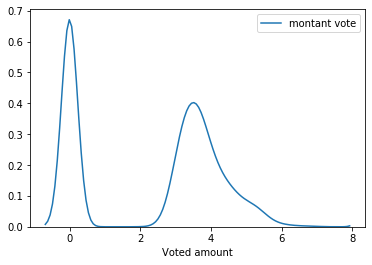

In [54]:
y = df["montant vote"]
logRev = np.log10(np.clip(y, a_min=1, a_max=None))
sns.kdeplot(logRev)
plt.xlabel('Voted amount')


    
* We see that the data is unbalanced, the number of the unsubventioned projects is much higher than the subventioned ones.


    
* Let's now visualize the distribution of some variables.

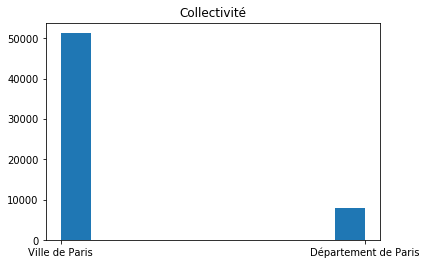

In [55]:
plt.title("Collectivité")
plt.hist(df["collectivite"]) 
plt.show()


* The most grants are given by the collectivity Ville de Paris.


    
* To get an idea about the the activities of the associations that benefit from subventions, let's extract the activity areas listed in the dataset and visualize the most popular ones.

In [56]:
secteur_activite = []   #Will contain the activity areas listed in the column "secteur activite"
for i in range(0, len(df),1): 
    secteur_activite.append(df['secteur activite'].iloc[i].split(';')[0])

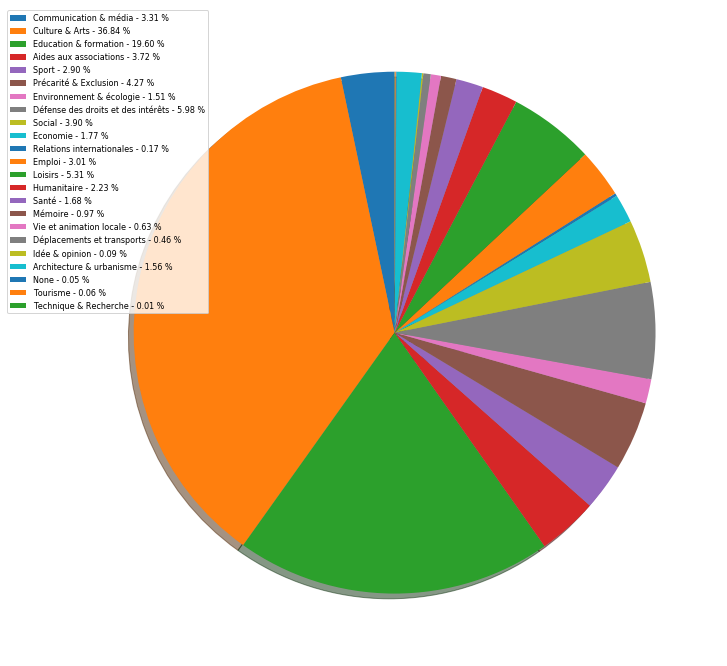

In [57]:
dict_secteur_activite = collections.Counter(secteur_activite)

secteurs = list(dict_secteur_activite.keys())
occurence_secteur = list(dict_secteur_activite.values())

percent = 100/sum(occurence_secteur) * np.array(occurence_secteur)
plt.figure(figsize=(12,12))

patches, texts = plt.pie(occurence_secteur, labels=None,
                  shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(secteurs, percent)]

plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

The most popular projects proposed by the associations are in the fields of "Culture and arts" and "Education and formation". So the projects in those fields have higher probablity to win the grant.



Let's visualize a barplot of the top fist associations that gained subventions the most time.

Text(0.5, 1.0, 'The top first associations that gained subventions the most time ')

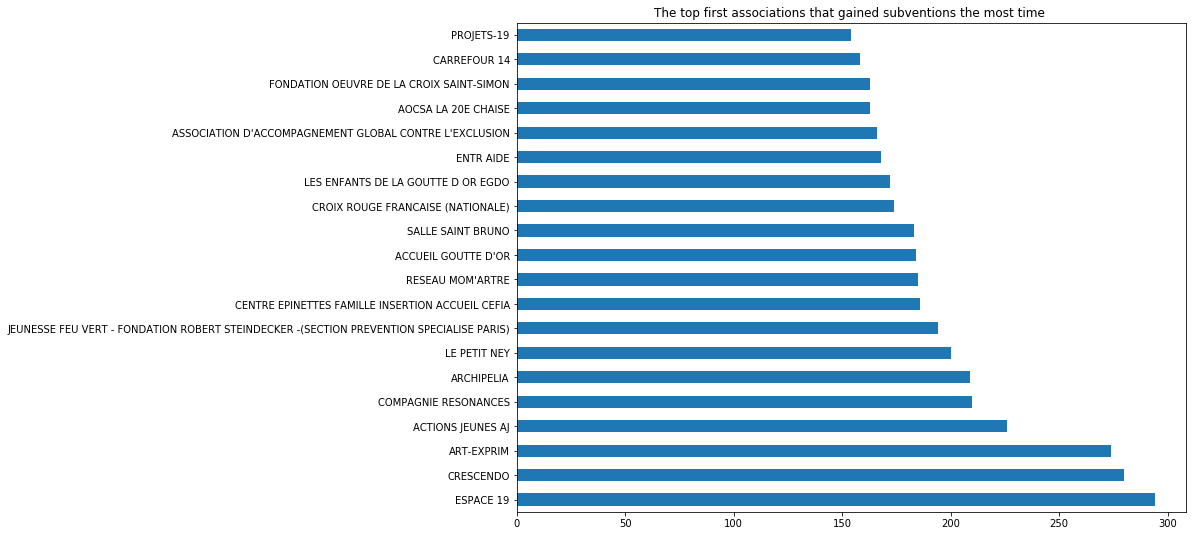

In [58]:
plt.figure(figsize=(12,9))
df['beneficiaire'].value_counts()[:20].plot(kind='barh')
plt.title('The top first associations that gained subventions the most time ')

The top three associations that gained subventions the most time are ESPACE 19, CRESCENDO and AR-EXPRIM. Those associations are likely to gain again subventions.

Let us now look at <b> the relation of each variable with the target column </b>. We consider categorical variables (with a small number of categories, so that they can be visualized).

Text(0.5, 1.0, 'Total amount of grants voted by Direction (Main direction of grant)')

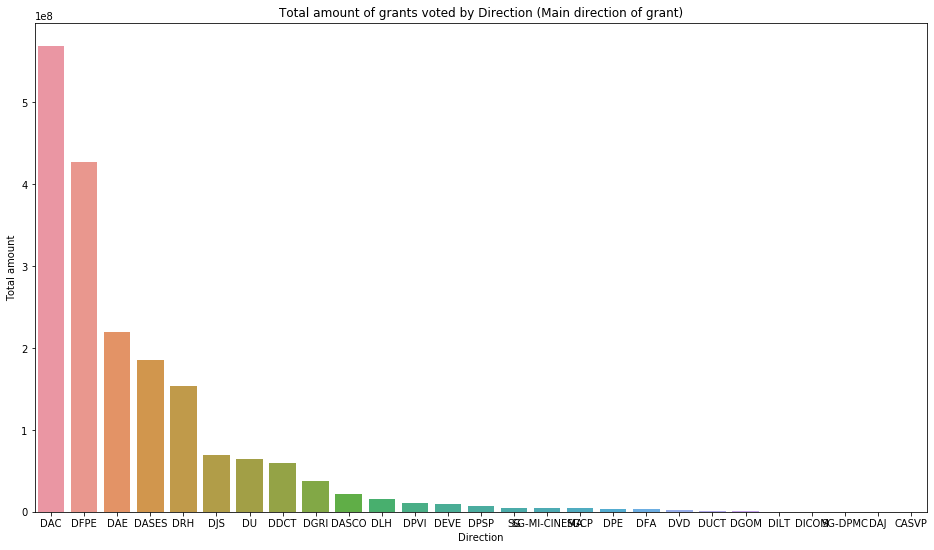

In [59]:
df1 = df[["direction","montant vote"]]
total_montant_by_direction = df1.groupby("direction")['montant vote'].apply(sum)
sorted_montant_by_direction = dict(sorted(dict(total_montant_by_direction).items(),
                                     key=lambda item: item[1], reverse=True))

directions = list(sorted_montant_by_direction.keys())
montants = list(sorted_montant_by_direction.values())

plt.figure(figsize=(16,9))
sns.barplot(x=directions, y=montants, orient='v')
plt.xlabel('Direction')
plt.ylabel('Total amount')
plt.title('Total amount of grants voted by Direction (Main direction of grant)')



As we can see in the next plot, the direction "DAC" has voted the bigger total amount of grants (around 600 million euros) followed by "DFPE" (around 400 million euros).

Text(0.5, 1.0, 'Total amount of grants voted by fiscal year')

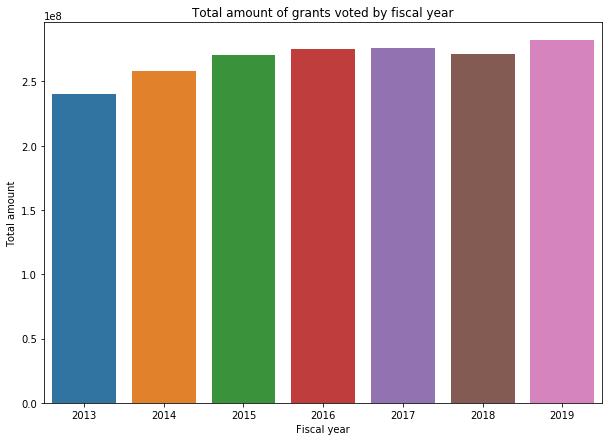

In [60]:
df1 = df[["anneeBudg","montant vote"]]
total_montant_by_annee = df1.groupby("anneeBudg")['montant vote'].apply(sum)
sorted_montant_by_annee = dict(sorted(dict(total_montant_by_annee).items(),
                                     key=lambda item: item[1], reverse=True))

annee = list(sorted_montant_by_annee.keys())
montants = list(sorted_montant_by_annee.values())

plt.figure(figsize=(10,7))
sns.barplot(x=annee, y=montants, orient='v')
plt.xlabel('Fiscal year')
plt.ylabel('Total amount')
plt.title('Total amount of grants voted by fiscal year')

The total amount of grants voted is increasing every year.

Text(0.5, 1.0, 'Total amount of grants voted by subvention nature')

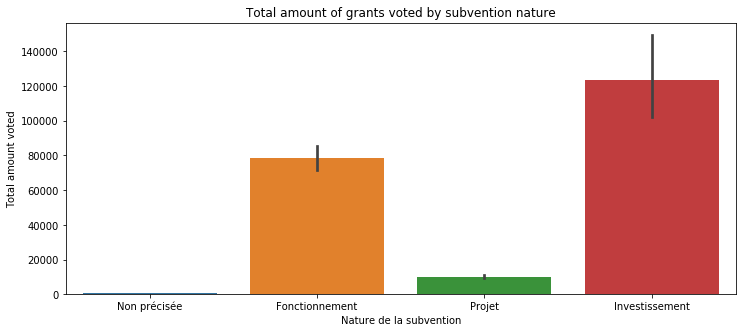

In [61]:
plt.figure(figsize=(12,5))
sns.barplot(x='Nature de la subvention', y='montant vote', data=df, orient='v')
plt.xlabel('Nature de la subvention')
plt.ylabel('Total amount voted')
plt.title('Total amount of grants voted by subvention nature')

We see that subventions requests with no nature or designation are most likely to be rejected. While subventions request to do investissement are the most accepted ones.

let us summary some important patterns that we discovered:
 - The biggest subventions are given in "ville de Paris" and by the directions DAC, DFPE.
 - The amount of subventions is increasing every year and is accoreded mostly to projects of investissement in the sector of "Culture and arts" and "Education and formation". 
 - The subvention vary a lot and might be zero, low or very high amount.  

# General Idea of the model and metric

## The Metric

### The classification metric

Since we first perform a binary classification, the F1 score is widely used to evaluate the performance of classification problems and it works as follows: 
(https://en.wikipedia.org/wiki/F1_score) 

${\displaystyle F_{1}=\left({\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}\right)=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" >

In [62]:
def classification_metric(y_true, y_pred):
    return f1_score(y_true, y_pred)

### Regression metric 

For the Regression metric we will use the Coefficient Determination or the $R^2$ coefficient. This metric 
represents the proportion of the y_true variance (here denoted as just $y$) to that is explained by our
y_pred (here denoted as $f$). 
It is closely related to MSE, but has the advantage of being scale-free.

This score ranges from $-\infty$ to 1 and we can see that if a model happens to predict only near to the mean $y$ value, it will then have a score value of zero.
When R² is negative it means that the model is worse than predicting the mean.





The $R^2$ formula is:
$$R^2(f,y) = 1 - \frac{\sum_{i=1}^n{(y_i - f_i)^2}}{\sum_{i=1}^n{(y_i - \bar{y})^2}}$$ 

where $\bar{y}$ is the mean of the y_true values ($y$).


In [63]:
from sklearn.metrics import  r2_score
def regression_metric(y_true, y_pred):
    return r2_score(y_true, y_pred)

## Model Metric

For the model metric since our model is doing both regression and classification ,the model metric will average the scores of regression and classification but with weights that we choose accodingly to what we want to emphasize more the regression or the classification as follows: 

$$params = y_{pred\_reg}, y_{test\_reg}, y_{pred\_class}, y_{test\_class}, \alpha_{class}, \alpha_{reg}$$
$$metric_{Model}(params)= \alpha_{class} metric_{classification} (y_{pred\_class}, y_{test\_class})  + \alpha_{reg} metric_{regression}(y_{pred\_reg}, y_{test\_reg})  $$

In [7]:
def model_metric(clf_metric, reg_metric):
    return (0.6 * clf_metric + 0.4 * reg_metric)

In [65]:
# Testing the metric
y_pred = np.array([1, 0, 1, 0, 0])
y_test = np.array([0, 0, 1, 0, 1])
y_pred2 = np.array([1233, -1, 7235, -1, -1])
y_test2 = np.array([1600, 0, 5000, 0, 0])
mask = np.where(y_pred2 >= 0)[0]
y_pred2 = y_pred2[mask]
y_test2 = y_test2[mask]

clf_metric = classification_metric(y_test,y_pred)
reg_metric = regression_metric(y_test2,y_pred2)
score = model_metric(clf_metric,reg_metric)
print("The score of the test example is " + str(score))

The score of the test example is 0.34498865051903116


Notice that we do this implementation in probem.py, that is, for evaluating the regression, we consider only the targets that were classified as receiving a grant.


# Baseline model 

## Loading train test Data

In [2]:
from problem import get_test_data, get_train_data
data_train, target_train = get_train_data()
data_test, target_test = get_test_data()

## Model

In [3]:
import imp
from sklearn.pipeline import make_pipeline

feature_extractor_clf = imp.load_source(
    '', 'submissions/starting_kit/feature_extractor_clf.py')
feature_extractor_reg = imp.load_source(
    '', 'submissions/starting_kit/feature_extractor_reg.py')
fe_clf = feature_extractor_clf.FeatureExtractor()
fe_reg = feature_extractor_reg.FeatureExtractor()

regressor = imp.load_source('', 'submissions/starting_kit/regressor.py')
reg = regressor.Regressor()

classifier = imp.load_source('', 'submissions/starting_kit/classifier.py')
clf = classifier.Classifier()

model_clf = make_pipeline(fe_clf, clf)
model_reg = make_pipeline(fe_reg, reg)

idx = np.where(target_train[:,0] > 0)[0]
# getting all non zero labels
y_train_clf = target_train[:, 0].copy()
y_train_reg = target_train[:, 1].copy()

idx = np.where(y_train_reg > 0)[0]
y_train_reg = y_train_reg[idx]

#Train clf
model_clf.fit(data_train, y_train_clf)
#Train reg on subventioned data
model_reg.fit(data_train.loc[idx,:], y_train_reg)

Pipeline(memory=None,
         steps=[('featureextractor', <.FeatureExtractor object at 0x125cbe588>),
                ('regressor', Regressor())],
         verbose=False)

In [4]:
y_pred_clf = model_clf.predict_proba(data_test)
y_pred_clf2 = np.argmax(y_pred_clf, axis=1)
pred_idx = np.where(y_pred_clf2 != 0)[0]
y_pred_reg = model_reg.predict(data_test.loc[pred_idx,:])
target_true_reg = target_test[pred_idx]

## Evaluation

In [5]:
from problem import *
f1 = F1_score()
clf_score = f1(target_test,y_pred_clf)
r2 = R2_score()
ttr = target_true_reg[:, 1].reshape(-1,1)
ypr = y_pred_reg.reshape(-1,1)
reg_score = r2(ttr,ypr)

In [8]:
score = model_metric(clf_score, reg_score)
print ("Classification f1-score="+ str(clf_score))
print ("R² score ="+ str(reg_score))
print("model metric = " + str(score))

Classification f1-score=0.9560019462014319
R² score =0.19605369622344515
model metric = 0.6520226462102372


# Submitting on RAMP

### Considerations on the RAMP's architecture
    
In order to make our challenge proposition work on the RAMP's architecture, we basically have to implement our version of the problem.py file.
    
Firstly, we have to define how our workflow class is going to be. In our case, we had to tell we were going to have 4 different elements: the feature_extrator_classifier, the classifier, the feature_extractor_regressor and the regressor.
Moreover, we had to look after some important details. One was the fact that, for classifiers, the RAMP does not work if we use, in our classifier file, the method predict; we have to use predict_proba. Also, we defined our problem such that the regression part trained only with the samples that our own classification model had predicted as having received a subsidy. So that meant the shape of y_pred for the regression will be smaller than the classification one. This is a problem, for the RAMP's architecture concatenates the its elements' y_pred arrays. So, we pulled out a trick to mark our regression array with a special value in order to separete it later when we calculate the score.
Finally, we had to write the read_data function, creating the classification y_true and returning both y_true, again, concatenated.

In [1]:
!ramp_test_submission --submission starting_kit

Testing Parisian associations grants prediction challenge
Reading train and test files from ./data ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  combined      f1    r2      time
	train     -0.21  0.0067 -0.54  1.578439
	valid     -0.22  0.0613 -0.63  0.254127
	test      -0.22  0.0632 -0.64  0.107141
CV fold 1
	score  combined      f1    r2      time
	train     -0.28  0.0055 -0.71  1.514537
	valid     -0.35  0.0620 -0.96  0.252611
	test      -0.32  0.0561 -0.89  0.105543
CV fold 2
	score  combined      f1    r2      time
	train     -0.43  0.0070 -1.08  1.551306
	valid     -0.34  0.0608 -0.95  0.243537
	test      -0.66  0.0621 -1.74  0.102661
CV fold 3
	score  combined      f1    r2      time
	train     -0.17  0.0062 -0.44  1.529265
	valid     -0.13  0.0581 -0.42  0.247094
	test      -0.15  0.0590 -0.45  0.099438
CV fold 4
	score  combined      f1    r2      time
	train     -0.32  0.0061 -0.81  1.455606
	valid     -0.62  0.0642 -1.64  0.241293
	test      -0.4